Progetto di Fondamenti di Scienza dei dati e Laboratorio
A.A. 2023/2024
Santarosssa Riccardo

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 50)


#Creazione dei dataframe utilizzando i file .xlsx
allShips = pd.read_excel('../UNI_DataScienceProject/DataSets/allShips.xlsx').dropna()
premiumShips = pd.read_excel('../UNI_DataScienceProject/DataSets/premiumShips.xlsx').dropna()
freeShips = pd.read_excel('../UNI_DataScienceProject/DataSets/freeShips.xlsx').dropna()


#Correzione di alcuni tipi di valori salvati nel set come stringhe
allShips['Battles'] = allShips['Battles'].str.replace(' ', '')

#Righe risultate problematiche durante la conversione in intero
allShips = allShips.drop(368)
allShips = allShips.drop(375)

#Conversione dei tipi float in interi per i calcoli successivi 
allShips['Battles'] = allShips['Battles'].values.astype(np.int64)
allShips['Tier'] = allShips['Tier'].values.astype(np.int64)
allShips['Avg. damage'] = allShips['Avg. damage'].str.replace(' ', '')
allShips['Avg. damage'] = allShips['Avg. damage'].values.astype(np.int64)

#Conversione dei dati in formato stringa in intero, per i calcoli successivi 
#Navi premium
premiumShips['Battles'] = premiumShips['Battles'].str.replace(' ', '')
premiumShips['Battles'] = premiumShips['Battles'].values.astype(np.int64)
premiumShips['Avg. damage'] = premiumShips['Avg. damage'].str.replace(' ', '')
premiumShips['Avg. damage'] = premiumShips['Avg. damage'].values.astype(np.int64)
premiumShips['Avg. experience'] = premiumShips['Avg. experience'].str.replace(' ', '')
premiumShips = premiumShips.dropna()
premiumShips['Avg. experience'] = premiumShips['Avg. experience'].values.astype(np.int64)

#Navi gratuite
freeShips['Battles'] = freeShips['Battles'].str.replace(' ', '')
freeShips['Avg. damage'] = freeShips['Avg. damage'].str.replace(' ', '')
freeShips['Avg. damage'] = freeShips['Avg. damage'].values.astype(np.int64)
freeShips['Avg. experience'] = freeShips['Avg. experience'].str.replace(' ', '')
freeShips = freeShips.dropna()
freeShips['Avg. experience'] = freeShips['Avg. experience'].values.astype(np.int64)

#Eliminazione della colonna con formato errato e non necessaria
allShips = allShips.drop('Avg. experience', axis = 1)

#allShips

In [53]:
#Costruzione del dataset con i miei dati (fonte: https://wows-numbers.com/)

ships = pd.Series(["Königsberg", "Langley", "Raimondo Montecuccoli", "Oktyabrskaya Revolutsiya", "Conte di Cavour", "Toulon", "Clemson", "T-22", 
                  "Karlsruhe", "Svietlana", "Kolberg", "Nicholas", "Bogatyr", "Orion", "Alberto di Giussano", "Arizona", "Maestrale", "Iron Duke", 
                  "V-170", "Taranto", "South Carolina", "Nazario Sauro", "Bellerophon", "Isokaze", "Curtatone", "Nino Bixio", "Dunquerque",
                  "Dante Alighieri", "Erie"])
tier = pd.Series([5, 4, 5, 5, 5, 7, 4, 5,
                 4, 4, 3, 5, 3, 4, 4, 6, 5, 5,
                 4, 3, 3, 3, 3, 4, 2, 2, 6, 
                 4, 1])
shipTipe = pd.Series(["Cruiser", "Aircraft Carrier", "Cruiser", "Battleship", "Battleship", "Cruiser", "Destroyer", "Destroyer",
                     "Cruiser", "Cruiser", "Cruiser", "Destroyer", "Cruiser", "Battleship", "Cruiser", "Battleship", "Destroyer", "Battleship",
                     "Destroyer", "Cruiser", "Battleship", "Cruiser", "Battleship", "Destroyer", "Destroyer", "Cruiser", "Battleship",
                      "Battleship", "Cruiser"])
nations = pd.Series(["Germany", "U.S.A.", "Italy", "U.S.S.R.", "Italy", "France", "U.S.A.", "Germany",
                    "Germany", "U.S.S.R.", "Germany", "U.S.A.", "U.S.S.R.", "U.K.", "Italy", "U.S.A.", "Italy", "U.K.",
                    "Germany", "Italy", "U.S.A.", "Italy", "U.K.", "Japan", "Italy", "Italy", "France",
                    "Italy", "U.S.A."])
battles = pd.Series([40, 18, 17, 16, 12, 11, 10, 10,
                    9, 8, 8, 8, 8, 8, 7, 7, 6, 6,
                    5, 5, 4, 4, 3, 3, 3, 2, 1,
                    1, 1])
winrate = pd.Series([0.3250, 0.4444, 0.5294, 0.3750, 0.3333, 0.6364, 0.6000, 0.6000,
                    0.4444, 0.3750, 0.5000, 0.5000, 0.3750, 0.6250, 0.4286, 0.4286, 0.1667, 0.4000,
                    0.4000, 0.4000, 0.7500, 0.5000, 0.6667, 0.0000, 0.3333, 0.5000, 1.0000,
                    1.0000, 0.0000])
frags = pd.Series([0.30, 0.28, 0.29, 0.63, 0.42, 0.73, 2.40, 0.70,
                  2.22, 1.88, 1.75, 0.25, 1.25, 1.38, 0.43, 0.71, 0.17, 0.40,
                  1.00, 0.80, 1.75, 1.25, 0.67, 1.33, 1.67, 1.50, 0.00,
                  1.00, 0.00])
dmg = pd.Series([12761, 19388, 8266, 23501, 18510, 26481, 33608, 8285, 
                 41662, 31753, 35807, 4181, 29662, 41810, 19425, 32557, 2325, 34000,
                 23217, 18401, 47259, 31360, 20941, 26917, 24523, 27659, 10394, 
                 59023, 11680])

myStatsSet = pd.DataFrame({'Warship' : ships, 'Tier': tier, 'Type' : shipTipe, 'Nation': nations, 'Battles' : battles,
                          'Win rate' : winrate, 'Avg. frags' : frags, 'Avg. damage' : dmg})


#myStatsSet

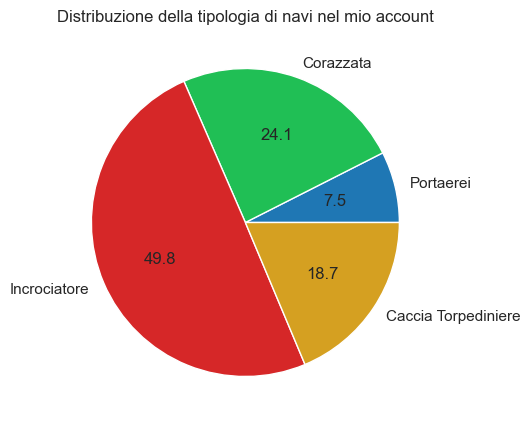

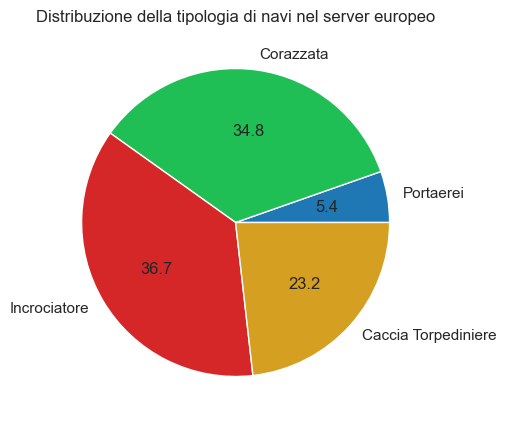

In [87]:
#Distribuzione della tipologia di navi giocate da me e dal server pubblico

#Raggruppamento e somma delle battaglie per ogni classe navale
battleCount = allShips.groupby(['Type'])['Battles'].sum().reset_index()
myBattleCount = myStatsSet.groupby(['Type'])['Battles'].sum().reset_index()

#Grafici a torta che definisono la distribuzione di utilizzo dei vari tipi di nave nel mio account rispetto al server europeo
#Parametri comuni
lbls = ['Portaerei', 'Corazzata', 'Incrociatore', 'Caccia Torpediniere']
colors = ['#1F77B4', '#20BF55', '#D62728', '#D5A021']

#Mio account
plt.figure(figsize = (8,5))
plt.title('Distribuzione della tipologia di navi nel mio account')
plt.pie(myBattleCount['Battles'], labels = lbls, colors = colors, autopct='%.1f')
plt.show()

#Server europeo
plt.figure(figsize = (8,5))
plt.title('Distribuzione della tipologia di navi nel server europeo')
plt.pie(battleCount['Battles'], labels = lbls, colors = colors, autopct='%.1f')
plt.show()

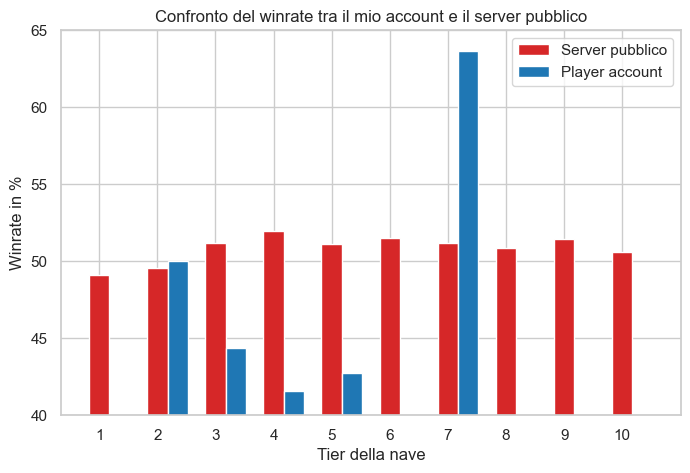

In [55]:
#Panoramica dei dati confrontati ai miei 
#Winrate del tipo "Cruiser" sul server europeo a confronto con il mio, diviso per Tier

#Filtro dei dati per tipologia di nave e per navi da me possedute
cruiserData = allShips[allShips['Type'] == 'Cruiser'].copy()
myCruiserData = myStatsSet[myStatsSet['Type'] == 'Cruiser'].copy()

cruiserData['Win rate'] = cruiserData['Win rate']*100
myCruiserData['Win rate'] = myCruiserData['Win rate']*100

#Raggruppo il winrate medio per ogni tier
groupedCrData = cruiserData.groupby(['Tier'])['Win rate'].mean().round(2).reset_index()
myGroupedData = myCruiserData.groupby(['Tier'])['Win rate'].mean().round(2).reset_index()

#Aggiunta dei dati mancanti
myGroupedData.loc[6] = [6, 0.00]
myGroupedData.loc[7] = [8, 0.00]
myGroupedData.loc[8] = [9, 0.00]
myGroupedData.loc[9] = [10, 0.00]
myGroupedData = myGroupedData.sort_values(['Tier'])

#Creazione della figura
sns.set(style="whitegrid")
plt.figure(figsize = (8, 5))
plt.ylim([40, 65])

#Creazione dei grafici affiancati
larghBarre = 0.35
startPoint = np.arange(1, 11)

plt.bar(startPoint, groupedCrData['Win rate'], larghBarre, color='#D62728', label='Server pubblico')
plt.bar(startPoint + larghBarre, myGroupedData['Win rate'], larghBarre, color='#1F77B4', label='Player account')
plt.xticks(startPoint)
plt.xlabel('Tier della nave')
plt.ylabel('Winrate in %')
plt.title('Confronto del winrate tra il mio account e il server pubblico')
plt.legend()
plt.show()

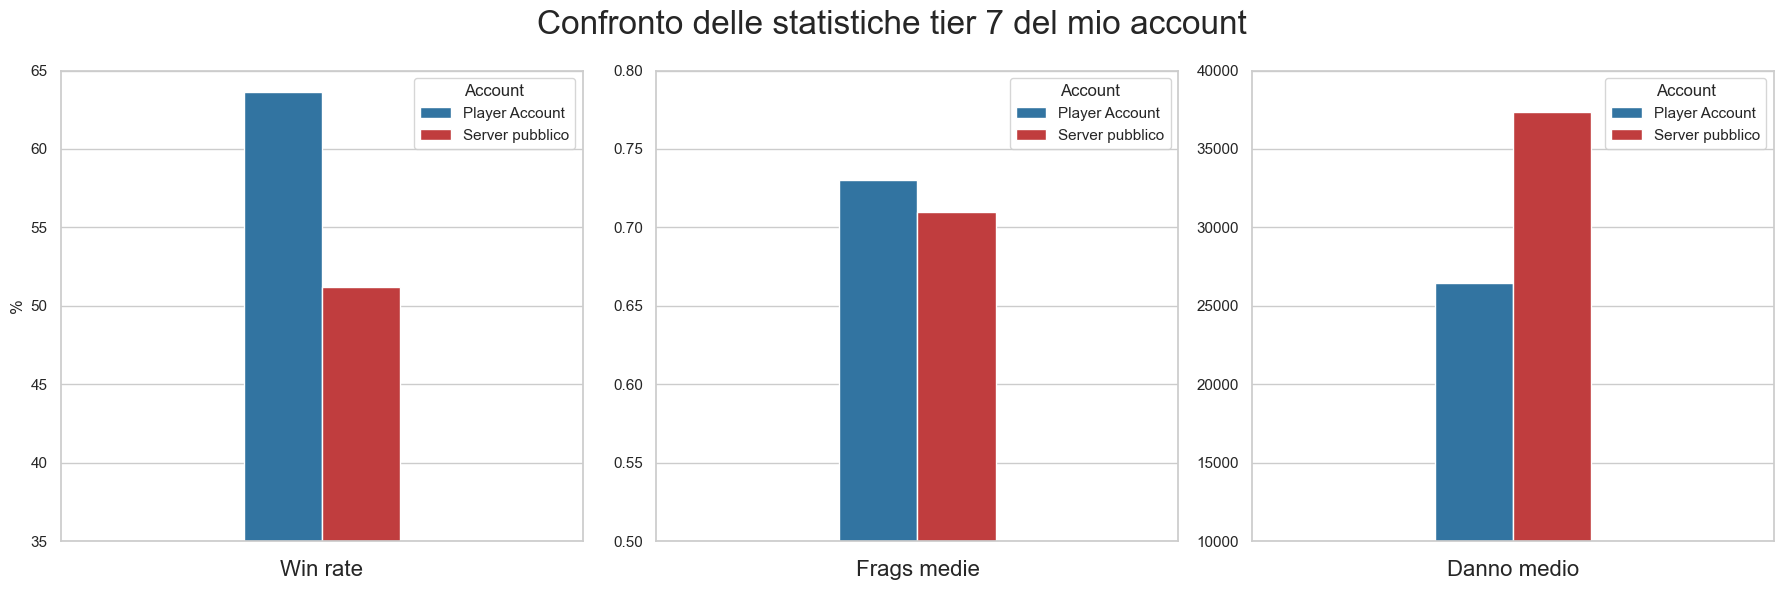

In [56]:
#Analisi dei miei cruiser al Tier 7 per vedere come la mia performance è rapportata rispetto al server europeo

#Estrazione dei miei cruisers tier 7 
myTier7Cruisers = myStatsSet[ (myStatsSet['Type'] == 'Cruiser') & (myStatsSet['Tier'] == 7.0)].copy()
myTier7Cruisers = myTier7Cruisers.drop(['Nation', 'Battles', 'Warship', 'Tier', 'Type'], axis = 1)
myTier7Cruisers['Win rate'] = myTier7Cruisers['Win rate'] * 100
myTier7Cruisers.insert(3, "Account", 'Player Account')

#Estrazione dei valori medi dei cruisers tier 7 per il server europeo
serverT7Cruisers = allShips[(allShips['Type'] == 'Cruiser') & (allShips['Tier'] == 7.0)].copy()
serverT7Cruisers = serverT7Cruisers.drop(['Nation', 'Avg. planes destroyed', 'Kills / deaths', 'Tier'], axis = 1)


#Creazione di un set formato dalle medie delle statistiche del server europeo
meanData = [{ 'Win rate' : np.round(serverT7Cruisers['Win rate'].mean() * 100, 4),
            'Avg. frags' : np.round(serverT7Cruisers['Avg. frags'].mean(), 2), 'Avg. damage' : np.round(serverT7Cruisers['Avg. damage'].mean(), 0),
            'Account' : 'Server pubblico'}]

meanT7Set = pd.DataFrame(meanData)
#Unione dei dati e grafico grouped
mergedData = pd.concat([myTier7Cruisers, meanT7Set], axis  = 0, ignore_index = True)

#Creazione del subplot che contiene i tre barplots
sns.set(style="whitegrid")
palette = ['#1F77B4', '#D62728']
fig, ax = plt.subplots(1,3, figsize = (18,6))

#Plot del winrate
ax[0].set_ylim([35, 65])
sns.barplot(data = mergedData, y = 'Win rate', hue = 'Account', palette = palette, width = 0.3, ax = ax[0])
ax[0].set_xlabel('Win rate')
ax[0].xaxis.label.set_size(16)
ax[0].set_ylabel('%')

#Plot delle frags
ax[1].set_ylim([0.5, 0.8])
sns.barplot(data = mergedData, y = 'Avg. frags', hue = 'Account', palette = palette, width = 0.3, ax = ax[1])
ax[1].set_xlabel('Frags medie')
ax[1].xaxis.label.set_size(16)
ax[1].set_ylabel('')

#Plot del danno medio
ax[2].set_ylim([10000, 40000])
sns.barplot(data = mergedData, y = 'Avg. damage', hue = 'Account', palette = palette, width = 0.3, ax = ax[2])
ax[2].set_xlabel('Danno medio')
ax[2].xaxis.label.set_size(16)
ax[2].set_ylabel('')

#Visualizzazione
fig.suptitle('Confronto delle statistiche tier 7 del mio account', fontsize = 24)
fig.tight_layout()
plt.show()

,Warship,Tier,Type,Nation,Battles,Win rate,Avg. frags,Avg. damage,Avg. experience,Avg. planes destroyed,Kills / deaths
0,Tirpitz,8,Battleship,Germany,11964389,0.4837,0.62,47002,1275,1.51,1.05
1,Scharnhorst,7,Battleship,Germany,6074533,0.5155,0.86,48860,1323,1.71,1.47
2,Atago,8,Cruiser,Japan,4964764,0.4939,0.58,36311,1255,1.05,0.99
3,Atlanta,7,Cruiser,U.S.A.,4182033,0.4948,0.68,28843,1267,2.74,0.96
4,Missouri,9,Battleship,U.S.A.,3766007,0.5337,0.80,67751,1634,2.60,1.34
...,...,...,...,...,...,...,...,...,...,...,...
76,Iwaki Alpha,4,Cruiser,Japan,86434,0.5777,1.15,32426,NaN,0.83,1.82
77,Varyag,3,Cruiser,U.S.S.R.,72970,0.5262,0.86,24185,NaN,0.00,1.35
78,Admiral Makarov,6,Cruiser,U.S.S.R.,33805,0.5071,0.64,34592,1157,1.18,1.03
79,Dreadnought,3,Battleship,U.K.,24837,0.5389,1.05,32703,NaN,0.00,1.98


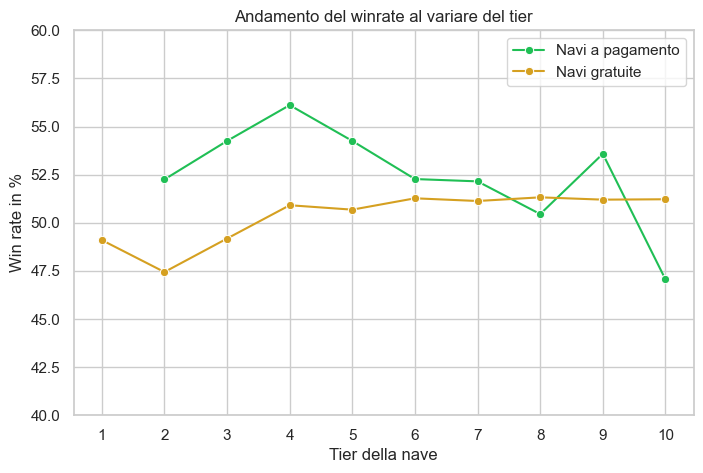

In [57]:
#Analisi delle statistiche delle navi premium (a pagamento) rispetto a quelle gratis
#Line chart per winrate e damage di navi premium e non a seconda del tier

#Operazioni sui dati di navi premium 
premiumDF = premiumShips.copy()
display(premiumDF)
premiumDF['Win rate'] = premiumDF['Win rate']*100
premiumGrouped = premiumDF.groupby(['Tier'])['Win rate'].mean().round(2).reset_index()

#Operazioni sui dati di navi gratuite 
freeDF = freeShips.copy()
freeDF['Win rate'] = freeDF['Win rate']*100
freeGrouped = freeDF.groupby(['Tier'])['Win rate'].mean().round(2).reset_index()
        
#Plot del winrate comparato
plt.figure(figsize = (8,5))
plt.ylim([40, 60])
sns.lineplot(data = premiumGrouped, x = 'Tier', y = 'Win rate', marker = 'o', errorbar = None, color = '#20BF55')
sns.lineplot(data = freeGrouped, x = 'Tier', y = 'Win rate', marker = 'o', errorbar = None, color = '#D5A021')
plt.xlabel('Tier della nave')
plt.ylabel('Win rate in %')
plt.xticks(np.arange(1,11))
plt.title('Andamento del winrate al variare del tier')
plt.legend(labels = ['Navi a pagamento', 'Navi gratuite'])
plt.show()

In [58]:
#Analisi delle statistiche di gioco al tier 10

#Distribuzione delle navi
premiumTier10 = premiumShips[premiumShips['Tier'] == 10].copy()
freeTier10 = freeShips[freeShips['Tier'] == 10].copy()

#Navi premium tier 10
premiumTier10 = premiumTier10.drop(['Avg. experience', 'Avg. planes destroyed', 'Kills / deaths'], axis = 1)
groupedT10 = premiumTier10.groupby(['Type']).size().reset_index(name = 'Numero navi')
display(groupedT10)
display(premiumTier10)

#Navi gratis tier 10
freeData = freeTier10.groupby(['Type']).size().reset_index(name = 'Numero navi')
printData = pd.DataFrame(freeData)
display(freeData)

,Type,Numero navi
0,Cruiser,1


,Warship,Tier,Type,Nation,Battles,Win rate,Avg. frags,Avg. damage
22,Salem,10,Cruiser,U.S.A.,1171330,0.4706,0.73,67037


,Type,Numero navi
0,Aircraft Carrier,5
1,Battleship,9
2,Cruiser,11
3,Destroyer,10


In [59]:
#Analisi delle statistiche al tier 8

#Numero di navi

premiumTier8 = premiumShips[premiumShips['Tier'] == 8].copy()
freeTier8 = freeShips[freeShips['Tier'] == 8].copy()

#Navi premium tier 8
premiumTier8 = premiumTier8.drop(['Avg. experience', 'Avg. planes destroyed', 'Kills / deaths'], axis = 1)
groupedT8= premiumTier8.groupby(['Type']).size().reset_index(name = 'Numero navi')
display(groupedT8)

#Navi gratis tier 8
freeData8 = freeTier8.groupby(['Type']).size().reset_index(name = 'Numero navi')
printData8 = pd.DataFrame(freeData8)
display(printData)


,Type,Numero navi
0,Battleship,7
1,Cruiser,3
2,Destroyer,6


,Type,Numero navi
0,Aircraft Carrier,5
1,Battleship,9
2,Cruiser,11
3,Destroyer,10


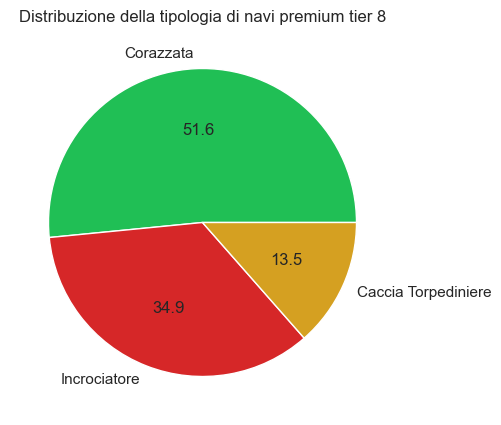

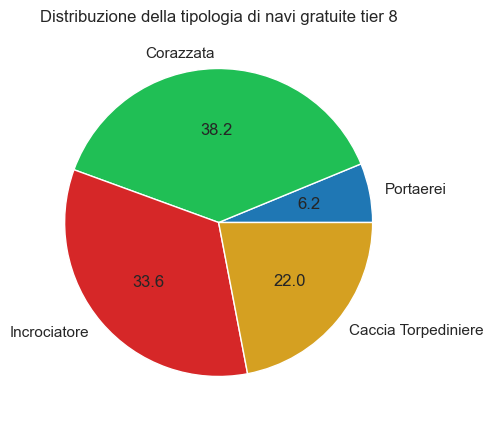

In [86]:
#Distribuzione in merito alle battaglie

#Conteggio delle battaglie
premiumCount = premiumTier8.groupby(['Type'])['Battles'].sum().reset_index()
freeCount = freeTier8.groupby(['Type'])['Battles'].sum().reset_index()

#Parametri comuni
lblsF = ['Portaerei', 'Corazzata', 'Incrociatore', 'Caccia Torpediniere']
colorsF = ['#1F77B4', '#20BF55', '#D62728', '#D5A021']
lblsP = ['Corazzata', 'Incrociatore', 'Caccia Torpediniere'] 
colorsP = ['#20BF55', '#D62728', '#D5A021']

#Creazione dei grafici 

#Navi premium
plt.figure(figsize = (8,5))
plt.title('Distribuzione della tipologia di navi premium tier 8')
plt.pie(premiumCount['Battles'], labels = lblsP, colors = colorsP, autopct='%.1f')
plt.show()

#Navi Gratuite
plt.figure(figsize = (8,5))
plt.title('Distribuzione della tipologia di navi gratuite tier 8')
plt.pie(freeCount['Battles'], labels = lblsF, colors = colorsF, autopct='%.1f')
plt.show()

In [61]:
#Analisi generale su tutti i tipi di nave


,Win rate,Avg. frags,Avg. damage,Avg. experience,status
0,51.0,0.704,54816.14,1458.86,premium
1,52.0,0.756,57837.40,1439.80,free


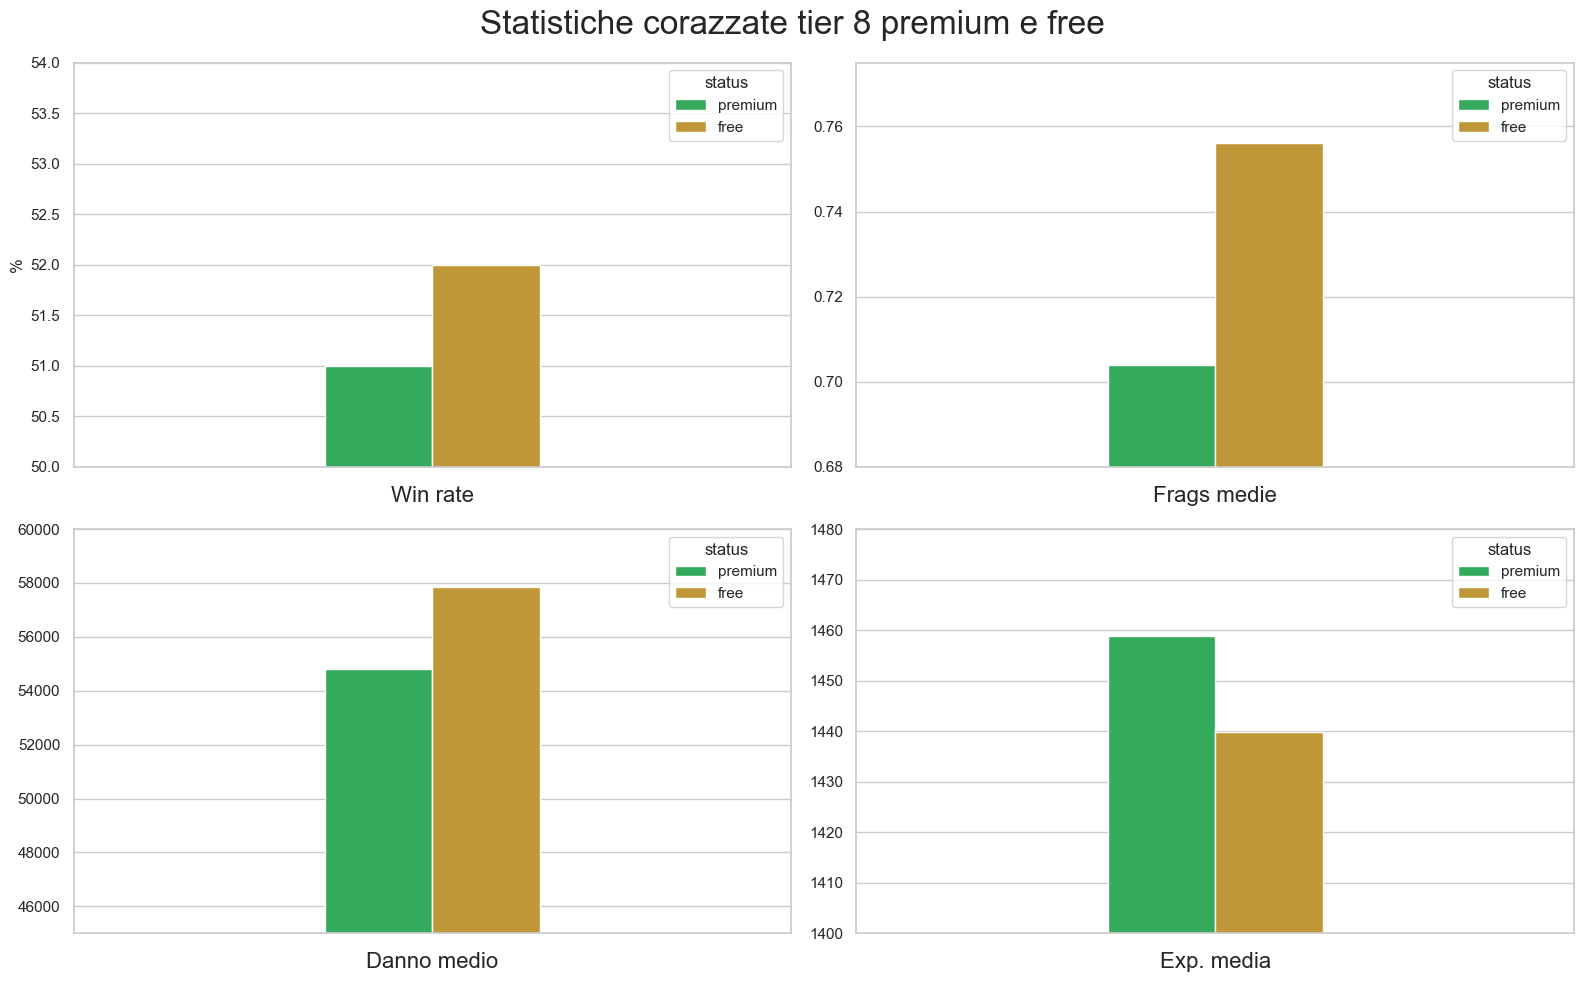

In [80]:
# Analisi specifica delle statistiche delle corazzate tier 8

#Estrazione delle corazzate, premium e free e aggiunta della colonna per distinguerle tra premium e no
premiumBB = premiumShips[(premiumShips['Type'] == 'Battleship') & (premiumShips['Tier'] == 8)].copy()
freeBB = freeShips[(freeShips['Type'] == 'Battleship') & (freeShips['Tier'] == 8)].copy()

#Costruzione di un dataframe con i dati medi
meanData = [[(premiumBB['Win rate'].mean().round(2))*100, premiumBB['Avg. frags'].mean().round(3), 
            premiumBB['Avg. damage'].mean().round(2), premiumBB['Avg. experience'].mean().round(2), 'premium'] ,
           [(freeBB['Win rate'].mean().round(2))*100, freeBB['Avg. frags'].mean().round(3), 
            freeBB['Avg. damage'].mean().round(2), freeBB['Avg. experience'].mean().round(2), 'free']]

meanT8DF = pd.DataFrame(meanData, columns = ['Win rate', 'Avg. frags', 'Avg. damage', 'Avg. experience', 'status'])

display(meanT8DF)

#Grafici di confronto

#Parametri iniziali
sns.set(style="whitegrid")
palette = ['#20BF55', '#D5A021']
fig, ax = plt.subplots(2,2, figsize = (16,10))

#Definizione dei 4 barplot

#Plot del winrate
ax[0][0].set_ylim([50, 54])
sns.barplot(data = meanT8DF, y = 'Win rate', hue = 'status', palette = palette, width = 0.3, ax = ax[0][0])
ax[0][0].set_xlabel('Win rate')
ax[0][0].xaxis.label.set_size(16)
ax[0][0].set_ylabel('%')

#Plot delle frags
ax[0][1].set_ylim([0.680, 0.775])
sns.barplot(data = meanT8DF, y = 'Avg. frags', hue = 'status', palette = palette, width = 0.3, ax = ax[0][1])
ax[0][1].set_xlabel('Frags medie')
ax[0][1].xaxis.label.set_size(16)
ax[0][1].set_ylabel('')

#Plot del danno 
ax[1][0].set_ylim([45000, 60000])
sns.barplot(data = meanT8DF, y = 'Avg. damage', hue = 'status', palette = palette, width = 0.3, ax = ax[1][0])
ax[1][0].set_xlabel('Danno medio')
ax[1][0].xaxis.label.set_size(16)
ax[1][0].set_ylabel('')

#Plot dell'esperienza media
ax[1][1].set_ylim([1400, 1480])
sns.barplot(data = meanT8DF, y = 'Avg. experience', hue = 'status', palette = palette, width = 0.3, ax = ax[1][1])
ax[1][1].set_xlabel('Exp. media')
ax[1][1].xaxis.label.set_size(16)
ax[1][1].set_ylabel('')

#Visualizzazione
fig.suptitle('Statistiche corazzate tier 8 premium e free', fontsize = 24)
fig.tight_layout()
plt.show()